# NMF Topic Models

Acknowledgement: This tutorial is adapted from Derek Greene (http://derekgreene.com/)

Topic modelling aims to automatically discover the hidden thematic structure in a large corpus of text documents. One approach for topic modelling is to apply *matrix factorisation* methods, such as *Non-negative Matrix Factorisation (NMF)*. In this notebook we look at how to apply NMF using the *scikit-learn* library in Python. We will also attempt a simple analysis of the terms given the top.

### Applying NMF

First, let's load the TF-IDF normalised document-term matrix and list of terms that we stored earlier using *Joblib*:

### Knowledge check:
1. Identify the location and name of the TF-IDF file that you save in the previous exercise
2. Inside the file name into the parameter of jobliub.load()

In [10]:
#from sklearn.externals import joblib
# A is the vectorized document
# terms is the feature names
import joblib
#(A,terms,snippets, raw_documents) = joblib.load( "REPLACE WITH YOUR FILE" )
(A,terms,snippets, raw_documents) = joblib.load('articles-tfidf_pk.pkl')
print( "Loaded %d X %d document-term matrix" % (A.shape[0], A.shape[1]) )

Loaded 4551 X 10285 document-term matrix


The key input parameter to NMF is the number of topics to generate *k*. For the moment, we will pre-specify a guessed value, for demonstration purposes.

In [11]:
k = 30

Another choice for NMF revolves around initialisation. Most commonly, NMF involves using random initialisation to populate the values in the factors W and H. Depending on the random seed that you use, you may get different results on the same dataset. Instead, using SVD-based initialisation provides more reliable results.

In [12]:
# create the model
from sklearn import decomposition
model = decomposition.NMF( init="nndsvd", n_components=k ) 
# apply the model and extract the two factor matrices
W = model.fit_transform( A )
H = model.components_

### Topic Descriptors

The top ranked terms from the *H* factor for each topic can give us an insight into the content of that topic. This is often called the *topic descriptor*. Let's define a function that extracts the descriptor for a specified topic: 

In [13]:
import numpy as np
def get_descriptor( terms, H, topic_index, top ):
    # reverse sort the values to sort the indices
    top_indices = np.argsort( H[topic_index,:] )[::-1]
    # now get the terms corresponding to the top-ranked indices
    top_terms = []
    for term_index in top_indices[0:top]:
        top_terms.append( terms[term_index] )
    return top_terms

We can now get a descriptor for each topic using the top ranked terms (e.g. top 10):

In [14]:
descriptors = []
for topic_index in range(k):
    descriptors.append( get_descriptor( terms, H, topic_index, 10 ) )
    str_descriptor = ", ".join( descriptors[topic_index] )
    print("Topic %02d: %s" % ( topic_index+1, str_descriptor ) )

Topic 01: eu, uk, european, brexit, britain, trade, europe, british, government, union
Topic 02: trump, donald, president, republican, campaign, america, presidential, white, election, american
Topic 03: people, think, life, get, really, time, know, go, got, things
Topic 04: arsenal, chelsea, wenger, conte, costa, team, hazard, game, season, manager
Topic 05: bank, banks, rbs, banking, deutsche, shares, customers, lloyds, financial, hsbc
Topic 06: nhs, care, patients, hospital, health, social, services, healthcare, hospitals, patient
Topic 07: album, music, band, pop, song, songs, rock, bowie, sound, guitar
Topic 08: facebook, internet, online, twitter, users, google, media, social, company, content
Topic 09: labour, party, corbyn, leader, mps, brexit, jeremy, ukip, voters, election
Topic 10: mental, health, people, children, services, depression, illness, problems, young, support
Topic 11: growth, economy, brexit, markets, pound, prices, rates, uk, inflation, market
Topic 12: league, 

The rankings above do not show the strength of association for the different terms. We can represent the distribution of the weights for the top terms in a topic using a *matplotlib* horizontal bar chart.

In [15]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use("ggplot")
matplotlib.rcParams.update({"font.size": 14})

Define a function to create a bar chart for the specified topic, based on the *H* factor from the current NMF model:

In [16]:
def plot_top_term_weights( terms, H, topic_index, top ):
    # get the top terms and their weights
    top_indices = np.argsort( H[topic_index,:] )[::-1]
    top_terms = []
    top_weights = []
    for term_index in top_indices[0:top]:
        top_terms.append( terms[term_index] )
        top_weights.append( H[topic_index,term_index] )
    # note we reverse the ordering for the plot
    top_terms.reverse()
    top_weights.reverse()
    # create the plot
    fig = plt.figure(figsize=(13,8))
    # add the horizontal bar chart
    ypos = np.arange(top)
    ax = plt.barh(ypos, top_weights, align="center", color="green",tick_label=top_terms)
    plt.xlabel("Term Weight",fontsize=14)
    plt.tight_layout()
    plt.show()

So for instance, for the 7th topic (index 6 !!! ) we can generate a plot with the top 15 terms using:

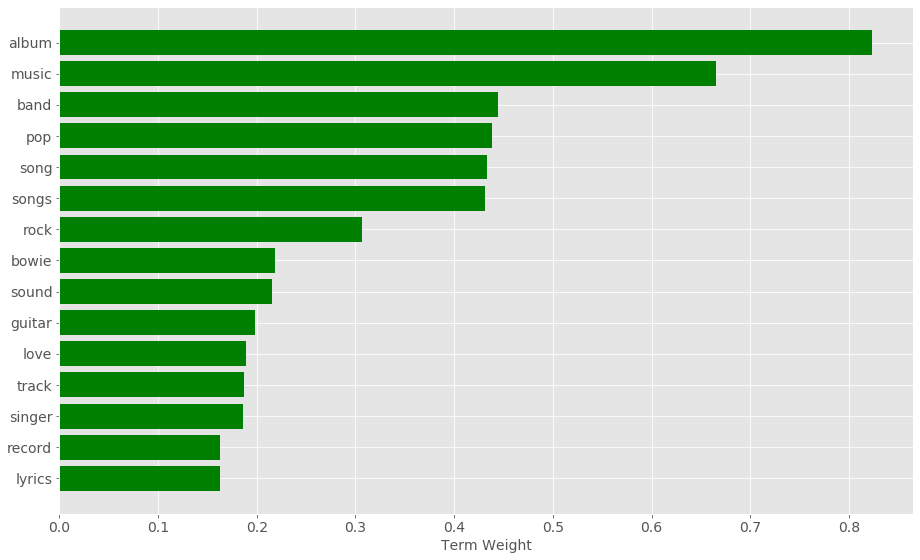

In [17]:
plot_top_term_weights( terms, H, 6, 15 )

#### Questions:
1. Sometimes, it may be required to compare more terms wrt the topic. How can you invoke plot_top_term_weights() to list more terms for the purpose of comparson.
2. If after inspecting the terms and you find some terms not relevant but carry a heavy weightable, what can you do to disregard those terms?
3. Should there be a need to inspect the same number of terms, for each topic? 
    


#### Exercises:
1. Call the function to display the distribution for topic 8 in a horizontal bar chart.
2. Inspect more terms ( for example 50) for topic 8. Which terms are meaningful?

which topic: 5
which terms: 12


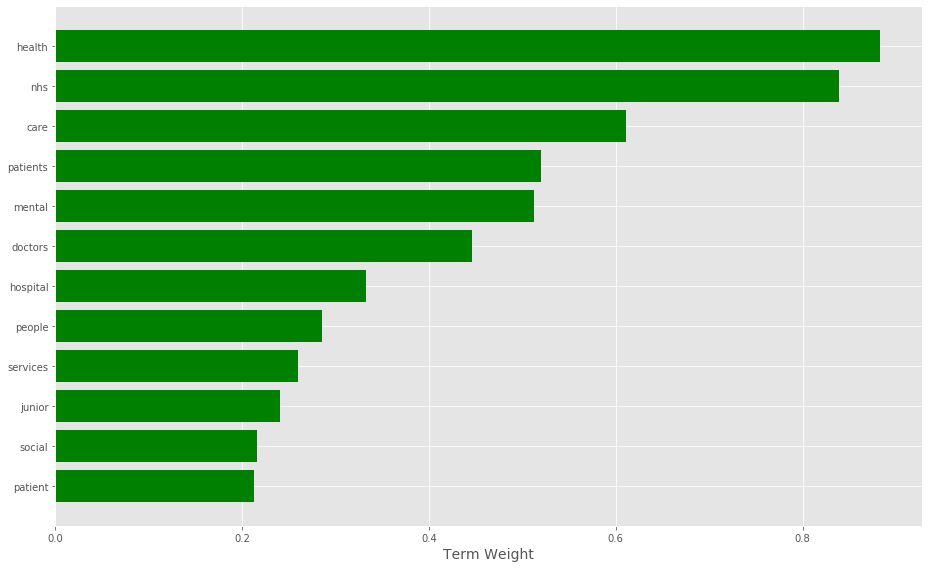

In [9]:
ntopic = int(input('which topic:'))
nterms = int(input('which terms:'))
plot_top_term_weights( terms, H, ntopic, nterms )

#### Reference:

https://github.com/derekgreene/topic-model-tutorial